### Realizando a requisição para capturar dados

In [1]:
import openpyxl
from bs4 import BeautifulSoup #responsável por minerar os sites
import requests #biblioteca para fazer requisições aos sites

In [2]:
HEADERS = {
'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; Touch; MAARJS; rv:11.0) like Gecko',
'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
'Accept-Encoding':'gzip,deflate,sdch',
'Accept-Language':'pt-BR; q=0.9;en-US,en;q=0.8',
'Connection':'Keep-alive',
'Referer':'https://www.google.com.br',
}

In [ ]:
resposta = requests.get("https://www.zoom.com.br/notebook?og=18000&og=18000&gclid=Cj0KCQjw--2aBhD5ARIsALiRlwAcWHiZQ54irYnARmSJUsa80Q2-kAQuBoJzOdGxYxpoYs--GOD0FmsaApAmEALw_wcB", headers = HEADERS) #se retornar 200 a requisição foi bem sucecida
resposta.text #retorna o html

soup = BeautifulSoup(resposta.text, 'html.parser')
soup

In [ ]:
prod_ofertas = soup.find_all(class_="Text_Text__bOTfK Text_MobileLabelXs__rr7ZF Text_DesktopLabelSAtLarge__xHZpN SearchCard_ProductCard_Name__ZaO5o") #guarda todos as tags que possui a classe passada no parametro do método
prod_ofertas_value = soup.find_all(class_= "Text_Text__bOTfK Text_MobileHeadingS__XS_Au")

produtos = []
prod_prices = []

for i in prod_ofertas:
  produtos.append(i.text)

for j in prod_ofertas_value:
  prod_prices.append(j.text)
  
produtos
prod_prices

### Passando as informações coletadas para uma planilha

In [5]:
planilha = openpyxl.Workbook()

planilha.create_sheet('Mercado Livre') #cria aba 

aba_produtos = planilha['Mercado Livre']
aba_produtos.append(['Produto', 'Preço'])

for i in range(0,len(produtos)):
  aba_produtos.append([produtos[i],prod_prices[i]])

planilha.save('produtos_ML.xlsx')

# Tratando os dados para construir um gráfico

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
produtos = np.array(produtos)
prod_prices = np.array(prod_prices)

In [ ]:
prod_valors = np.stack((produtos, prod_prices), axis = 1)
prod_valors

In [ ]:
data_df = pd.DataFrame(prod_valors, columns=['Produto', 'Preço'])
data_df

In [ ]:
data_df.info()

In [30]:
def corrigir_valores(valor):
    valor = valor.replace('.', '').replace('R$', '').replace(',','')
    return valor

data_df['Preço'] = data_df['Preço'].apply(corrigir_valores) #aplica na coluna 'Preço' sem os valores sem o . e R$

In [31]:
data_df['Preço'] = data_df['Preço'].astype('int64') #converter objeto para int64

In [ ]:
data_df['Preço']

In [ ]:
menor3 = 0
maior3 = 0
maior6 = 0
texts = ['Menor do que R$ 3.000,00', 'Menor do que R$ 6.000,00', 'Maior do que R$ 6.000,00']

for i in range(0,len(data_df['Preço'])):
  if data_df['Preço'][i]<300000:
    menor3 = menor3 + 1
  elif data_df['Preço'][i]<600000:
    maior3 = maior3 + 1
  else :
    maior6 = maior6 + 1

quantPr = [menor3,maior3,maior6]

### Criando gráfico

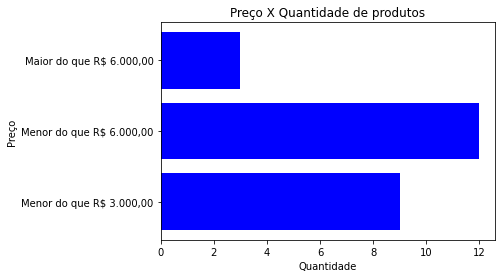

In [54]:
plt.barh(texts, quantPr, facecolor = 'blue')
plt.title('Preço X Quantidade de produtos')
plt.xlabel('Quantidade')
plt.ylabel('Preço')
plt.show()
#plt.savefig('grafico.png', dpi=200)